<a href="https://colab.research.google.com/github/juliaschubertpeixoto/TCC/blob/main/%5BCROSS_VIEW%5D_NTU_RGB%2BD_12_gestures_training.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Libraries


In [ ]:
from matplotlib import pyplot as plt
import numpy as np
import os
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MaxAbsScaler, MinMaxScaler
from sklearn.utils import shuffle
import tensorflow as tf 
from tensorflow.keras import datasets, layers, models

#Data Processing

##Load Data

In [ ]:
path = '/content/drive/MyDrive/artigo_IEEE/datasets/NTU-RGB-D cross view data'
os.chdir(path)
X_train = np.load('train_data.npy' ).astype(np.float32)
y_train = np.load('train_tag.npy' ).astype(np.int32)
X_eval = np.load('eval_data.npy' ).astype(np.float32)
y_eval = np.load('eval_tag.npy' ).astype(np.int32)
print("Data imported successfuly!")

Data imported successfuly!


##Split Data

In [ ]:
X_val, X_test, y_val, y_test = train_test_split(X_eval, y_eval, test_size=0.5, random_state=42)
print("Data splited successfuly!")
print(" ")
print("Number of samples on training set:", y_train.shape[0])
print("Number of samples on validation set:", y_val.shape[0])
print("Number of samples on test set:", y_test.shape[0] )

Data splited successfuly!
 
Number of samples on training set: 7486
Number of samples on validation set: 1894
Number of samples on test set: 1895


##Normalize data

In [ ]:
new_train_data = tf.reshape(X_train, (-1,299*80)) 
n = MaxAbsScaler() 
n.fit(new_train_data)
newN = n.transform(new_train_data)
X_train = tf.reshape(newN, (-1,299,80))
print("Data normalized successfuly!")

Data normalized successfuly!


In [ ]:
new_train_data = tf.reshape(X_val, (-1,299*80)) 
n = MaxAbsScaler() 
n.fit(new_train_data)
newN = n.transform(new_train_data)
X_val = tf.reshape(newN, (-1,299,80))
print("Data normalized successfuly!")

Data normalized successfuly!


In [ ]:
new_train_data = tf.reshape(X_test, (-1,299*80)) 
n = MaxAbsScaler() 
n.fit(new_train_data)
newN = n.transform(new_train_data)
X_test = tf.reshape(newN, (-1,299,80))
print("Data normalized successfuly!")

Data normalized successfuly!


##Reshape Data

In [ ]:
train_data_conv = tf.reshape(X_train, (-1,299,80,1))
val_data_conv = tf.reshape(X_val, (-1,299,80,1))
test_data_conv = tf.reshape(X_test, (-1,299,80,1))
print("Data reshaped successfuly!")

Data reshaped successfuly!


#Convolutional Neural Network

##Training

*Proposed Model*

In [ ]:
model = models.Sequential()
model.add(layers.Input(shape=(299,80,1)))
model.add(layers.Conv2D(16, (3, 3), activation='relu', padding='same'))
model.add(layers.MaxPooling2D((3, 3), strides=3))
model.add(layers.Conv2D(32, (3, 3), activation='relu', padding='same'))
model.add(layers.MaxPooling2D((3, 3), strides=3))
model.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(layers.MaxPooling2D((2,2), strides=2))
model.add(layers.Flatten())
model.add(layers.Dense(units=7104, activation='relu'))
model.add(layers.Dropout(0.4))
model.add(layers.Dense(units=12, activation='softmax'))
model.summary()

model.compile(optimizer='Adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 299, 80, 16)       160       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 99, 26, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 99, 26, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 33, 8, 32)        0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 33, 8, 64)         18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 16, 4, 64)        0

*Training*

In [ ]:
history = model.fit(train_data_conv, y_train,
          validation_data=(val_data_conv, y_val),
          batch_size=10,
          epochs=30, shuffle=True)

Epoch 1/30
749/749 [==============================] - 236s 314ms/step - loss: 2.3707 - accuracy: 0.1347 - val_loss: 1.8958 - val_accuracy: 0.3041
Epoch 2/30
749/749 [==============================] - 237s 317ms/step - loss: 1.4802 - accuracy: 0.4774 - val_loss: 1.2808 - val_accuracy: 0.5634
Epoch 3/30
749/749 [==============================] - 238s 318ms/step - loss: 1.1352 - accuracy: 0.6035 - val_loss: 1.0776 - val_accuracy: 0.6151
Epoch 4/30
749/749 [==============================] - 236s 316ms/step - loss: 1.0373 - accuracy: 0.6391 - val_loss: 1.2175 - val_accuracy: 0.5982
Epoch 5/30
749/749 [==============================] - 243s 325ms/step - loss: 0.9631 - accuracy: 0.6583 - val_loss: 0.9740 - val_accuracy: 0.6758
Epoch 6/30
749/749 [==============================] - 242s 324ms/step - loss: 0.9004 - accuracy: 0.6838 - val_loss: 1.0687 - val_accuracy: 0.6352
Epoch 7/30
749/749 [==============================] - 244s 326ms/step - loss: 0.8536 - accuracy: 0.6949 - val_loss: 1.1439 -

###Analysis

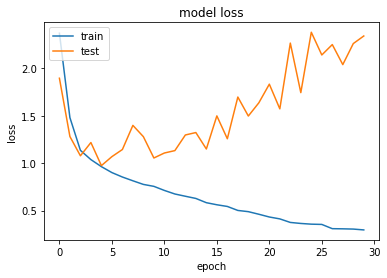

In [ ]:
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.title("model loss")
plt.ylabel("loss")
plt.xlabel("epoch")
plt.legend(["train", "test"], loc="upper left")
plt.show()

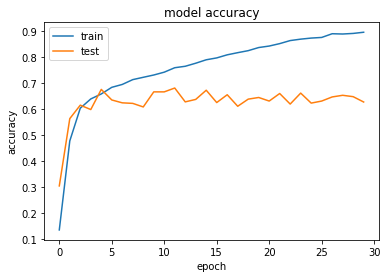

In [ ]:
plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])
plt.title("model accuracy")
plt.ylabel("accuracy")
plt.xlabel("epoch")
plt.legend(["train", "test"], loc="upper left")
plt.show()

##Testing

In [ ]:
y_pred = model.predict(test_data_conv)
new_pred = np.zeros(y_pred.shape[0])
for i in range(y_pred.shape[0]):
  new_pred[i] = np.argmax(y_pred[i])
print("Testing Accuracy: ", sklearn.metrics.accuracy_score(y_true=y_test, y_pred=new_pred))

Testing Accuracy:  0.6174142480211082


In [ ]:
print(sklearn.metrics.classification_report(y_test, new_pred))

              precision    recall  f1-score   support

           0       0.55      0.27      0.36       153
           1       0.51      0.44      0.47       169
           2       0.44      0.41      0.42       155
           3       0.35      0.78      0.49       165
           4       0.75      0.80      0.77       157
           5       0.94      0.98      0.96       163
           6       0.68      0.85      0.75       165
           7       0.96      0.88      0.92       168
           8       0.95      0.95      0.95       143
           9       0.72      0.31      0.44       151
          10       0.38      0.49      0.43       152
          11       0.51      0.22      0.31       154

    accuracy                           0.62      1895
   macro avg       0.64      0.61      0.61      1895
weighted avg       0.64      0.62      0.61      1895



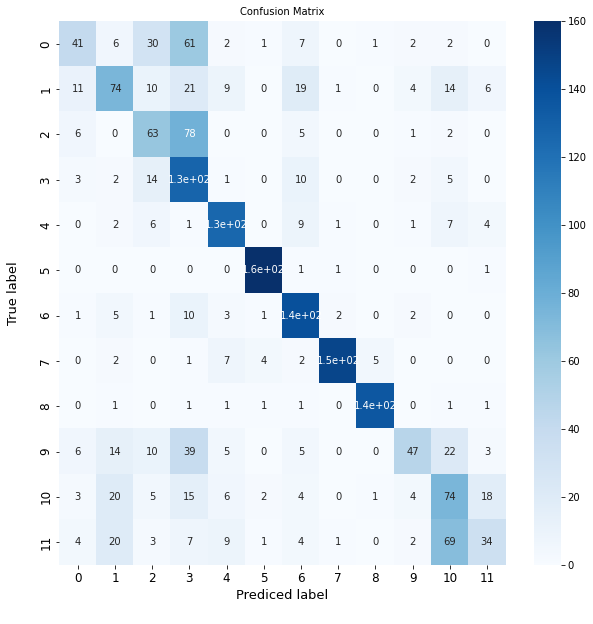

In [ ]:
import seaborn as sns
cm = sklearn.metrics.confusion_matrix(y_true=y_test, y_pred=new_pred)
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(cm, annot=True, cmap='Blues')
ax.set_title("Confusion Matrix", fontsize=10)
ax.set_xticklabels(ax.get_xticklabels(), fontsize=12)
ax.set_yticklabels(ax.get_yticklabels(), fontsize=12)
plt.ylabel('True label\n', fontsize=13)
plt.xlabel('Prediced label\n', fontsize=13)
plt.show()

In [ ]:
for i in range(len(cm)):
  den = sum(cm[i])
  num = cm[i][i]
  accuracy = num/den
  print("Accuracy for gesture", i)
  print(str(accuracy*100)+"%")
  print(' ')

Accuracy for gesture 0
26.797385620915033%
 
Accuracy for gesture 1
43.786982248520715%
 
Accuracy for gesture 2
40.64516129032258%
 
Accuracy for gesture 3
77.57575757575758%
 
Accuracy for gesture 4
80.2547770700637%
 
Accuracy for gesture 5
98.15950920245399%
 
Accuracy for gesture 6
84.84848484848484%
 
Accuracy for gesture 7
87.5%
 
Accuracy for gesture 8
95.1048951048951%
 
Accuracy for gesture 9
31.125827814569533%
 
Accuracy for gesture 10
48.68421052631579%
 
Accuracy for gesture 11
22.07792207792208%
 


#Recurrent Neural Network

##Training

*Model*

In [ ]:
model = tf.keras.Sequential([
tf.keras.layers.InputLayer(input_shape=(299,80)),   
tf.keras.layers.LSTM(128, return_sequences=True),
tf.keras.layers.LSTM(128, dropout=0.1),
tf.keras.layers.Dense(12, activation='softmax')
])

model.compile(optimizer = 'RMSProp',
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 299, 128)          107008    
                                                                 
 lstm_1 (LSTM)               (None, 128)               131584    
                                                                 
 dense_2 (Dense)             (None, 12)                1548      
                                                                 
Total params: 240,140
Trainable params: 240,140
Non-trainable params: 0
_________________________________________________________________


*Training*

In [ ]:
history = model.fit(X_train, y_train,
          validation_data=(X_val, y_val),
          batch_size=10,
          epochs=30, shuffle=True)

Epoch 1/30
749/749 [==============================] - 428s 565ms/step - loss: 2.1219 - accuracy: 0.2404 - val_loss: 1.8011 - val_accuracy: 0.3094
Epoch 2/30
749/749 [==============================] - 414s 553ms/step - loss: 1.8276 - accuracy: 0.3528 - val_loss: 1.5123 - val_accuracy: 0.4725
Epoch 3/30
749/749 [==============================] - 416s 555ms/step - loss: 1.6410 - accuracy: 0.4343 - val_loss: 1.6172 - val_accuracy: 0.4208
Epoch 4/30
749/749 [==============================] - 415s 555ms/step - loss: 1.5267 - accuracy: 0.4658 - val_loss: 1.5181 - val_accuracy: 0.4234
Epoch 5/30
749/749 [==============================] - 414s 553ms/step - loss: 1.4768 - accuracy: 0.4909 - val_loss: 1.6009 - val_accuracy: 0.4277
Epoch 6/30
749/749 [==============================] - 409s 547ms/step - loss: 1.4440 - accuracy: 0.4965 - val_loss: 1.3239 - val_accuracy: 0.5248
Epoch 7/30
749/749 [==============================] - 409s 547ms/step - loss: 1.3377 - accuracy: 0.5335 - val_loss: 1.2775 -

###Analysis

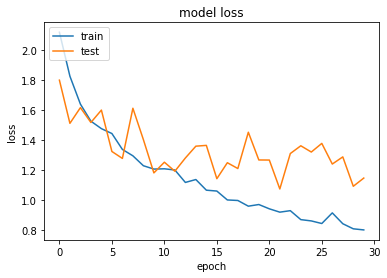

In [ ]:
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.title("model loss")
plt.ylabel("loss")
plt.xlabel("epoch")
plt.legend(["train", "test"], loc="upper left")
plt.show()

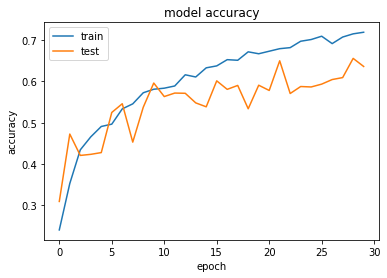

In [ ]:
plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])
plt.title("model accuracy")
plt.ylabel("accuracy")
plt.xlabel("epoch")
plt.legend(["train", "test"], loc="upper left")
plt.show()

##Testing

In [ ]:
y_pred = model.predict(X_test)
new_pred = np.zeros(y_pred.shape[0])
for i in range(y_pred.shape[0]):
  new_pred[i] = np.argmax(y_pred[i])
print("Testing Accuracy: ", sklearn.metrics.accuracy_score(y_true=y_test, y_pred=new_pred))

Testing Accuracy:  0.6401055408970976


In [ ]:
print(sklearn.metrics.classification_report(y_test, new_pred))

              precision    recall  f1-score   support

           0       0.54      0.32      0.40       153
           1       0.70      0.55      0.62       169
           2       0.55      0.64      0.59       155
           3       0.47      0.60      0.53       165
           4       0.56      0.60      0.58       157
           5       0.94      0.94      0.94       163
           6       0.66      0.87      0.75       165
           7       0.95      0.84      0.89       168
           8       0.67      0.85      0.75       143
           9       0.57      0.69      0.63       151
          10       0.49      0.51      0.50       152
          11       0.58      0.25      0.35       154

    accuracy                           0.64      1895
   macro avg       0.64      0.64      0.63      1895
weighted avg       0.64      0.64      0.63      1895



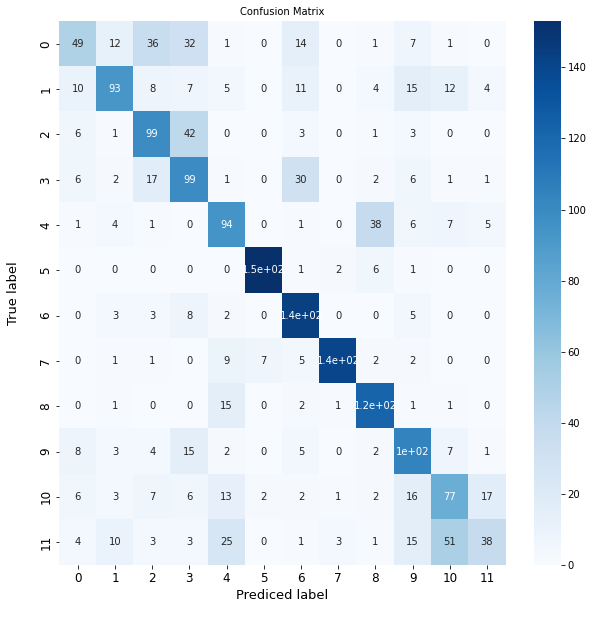

In [ ]:
import seaborn as sns
cm = sklearn.metrics.confusion_matrix(y_true=y_test, y_pred=new_pred)
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(cm, annot=True, cmap='Blues')
ax.set_title("Confusion Matrix", fontsize=10)
ax.set_xticklabels(ax.get_xticklabels(), fontsize=12)
ax.set_yticklabels(ax.get_yticklabels(), fontsize=12)
plt.ylabel('True label\n', fontsize=13)
plt.xlabel('Prediced label\n', fontsize=13)
plt.show()

In [ ]:
for i in range(len(cm)):
  den = sum(cm[i])
  num = cm[i][i]
  accuracy = num/den
  print("Accuracy for gesture", i)
  print(str(accuracy*100)+"%")
  print(' ')

Accuracy for gesture 0
32.02614379084967%
 
Accuracy for gesture 1
55.02958579881657%
 
Accuracy for gesture 2
63.87096774193548%
 
Accuracy for gesture 3
60.0%
 
Accuracy for gesture 4
59.87261146496815%
 
Accuracy for gesture 5
93.86503067484662%
 
Accuracy for gesture 6
87.27272727272727%
 
Accuracy for gesture 7
83.92857142857143%
 
Accuracy for gesture 8
85.3146853146853%
 
Accuracy for gesture 9
68.87417218543047%
 
Accuracy for gesture 10
50.6578947368421%
 
Accuracy for gesture 11
24.675324675324674%
 


# GRU

In [ ]:
model = tf.keras.Sequential([
tf.keras.layers.InputLayer(input_shape=(299,80)),   
tf.keras.layers.GRU(128, return_sequences=True),
tf.keras.layers.GRU(128, return_sequences=True, dropout=0.1),
tf.keras.layers.Conv1D(60, 1, activation='relu', padding='same'),
tf.keras.layers.Flatten(),
tf.keras.layers.Dense(12, activation='softmax')
])
opt = tf.keras.optimizers.RMSprop(learning_rate=0.001)
model.compile(optimizer = opt,
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru (GRU)                   (None, 299, 128)          80640     
                                                                 
 gru_1 (GRU)                 (None, 299, 128)          99072     
                                                                 
 conv1d (Conv1D)             (None, 299, 60)           7740      
                                                                 
 flatten (Flatten)           (None, 17940)             0         
                                                                 
 dense (Dense)               (None, 12)                215292    
                                                                 
Total params: 402,744
Trainable params: 402,744
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history = model.fit(X_train, y_train,
          validation_data=(X_val, y_val),
          batch_size=10,
          epochs=30, shuffle=True)

Epoch 1/30
749/749 [==============================] - 114s 133ms/step - loss: 2.5605 - accuracy: 0.1087 - val_loss: 2.4034 - val_accuracy: 0.1732
Epoch 2/30
749/749 [==============================] - 99s 132ms/step - loss: 2.0385 - accuracy: 0.3161 - val_loss: 1.9752 - val_accuracy: 0.3765
Epoch 3/30
749/749 [==============================] - 98s 131ms/step - loss: 1.6002 - accuracy: 0.4866 - val_loss: 1.3550 - val_accuracy: 0.5692
Epoch 4/30
749/749 [==============================] - 98s 131ms/step - loss: 1.4091 - accuracy: 0.5433 - val_loss: 1.4931 - val_accuracy: 0.5671
Epoch 5/30
749/749 [==============================] - 98s 131ms/step - loss: 1.2896 - accuracy: 0.5721 - val_loss: 1.3781 - val_accuracy: 0.6193
Epoch 6/30
749/749 [==============================] - 98s 131ms/step - loss: 1.2329 - accuracy: 0.5954 - val_loss: 1.2921 - val_accuracy: 0.6457
Epoch 7/30
749/749 [==============================] - 98s 131ms/step - loss: 1.1957 - accuracy: 0.6176 - val_loss: 5.7604 - val_a

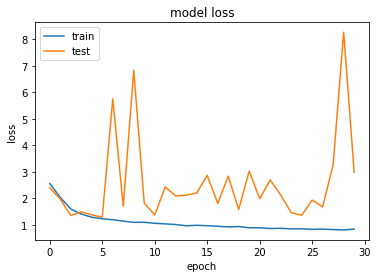

In [ ]:
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.title("model loss")
plt.ylabel("loss")
plt.xlabel("epoch")
plt.legend(["train", "test"], loc="upper left")
plt.show()

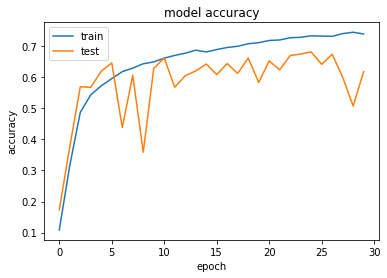

In [ ]:
plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])
plt.title("model accuracy")
plt.ylabel("accuracy")
plt.xlabel("epoch")
plt.legend(["train", "test"], loc="upper left")
plt.show()

In [ ]:
y_pred = model.predict(X_test)
new_pred = np.zeros(y_pred.shape[0])
for i in range(y_pred.shape[0]):
  new_pred[i] = np.argmax(y_pred[i])
print("Testing Accuracy: ", sklearn.metrics.accuracy_score(y_true=y_test, y_pred=new_pred))

Testing Accuracy:  0.6116094986807388


In [ ]:
print(sklearn.metrics.classification_report(y_test, new_pred))

              precision    recall  f1-score   support

           0       0.67      0.14      0.24       153
           1       0.76      0.36      0.48       169
           2       0.56      0.12      0.19       155
           3       0.33      0.64      0.43       165
           4       0.76      0.72      0.74       157
           5       0.95      0.97      0.96       163
           6       0.53      0.94      0.68       165
           7       0.95      0.91      0.93       168
           8       0.96      0.97      0.97       143
           9       0.63      0.48      0.54       151
          10       0.36      0.47      0.41       152
          11       0.45      0.60      0.51       154

    accuracy                           0.61      1895
   macro avg       0.66      0.61      0.59      1895
weighted avg       0.66      0.61      0.59      1895



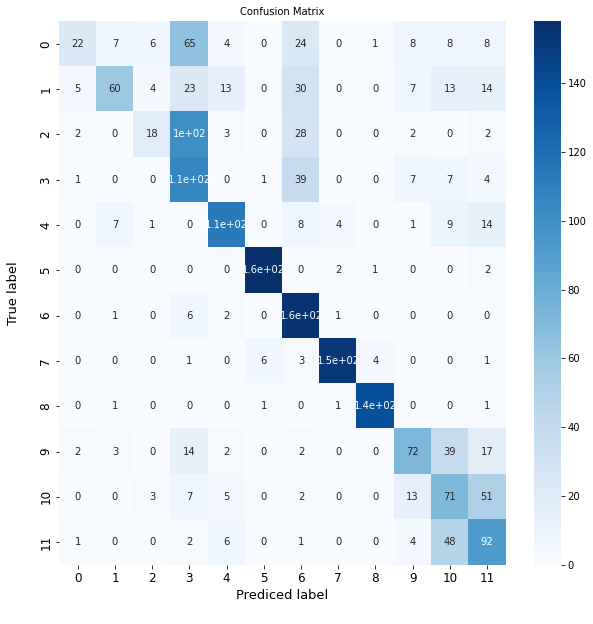

In [ ]:
import seaborn as sns
cm = sklearn.metrics.confusion_matrix(y_true=y_test, y_pred=new_pred)
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(cm, annot=True, cmap='Blues')
ax.set_title("Confusion Matrix", fontsize=10)
ax.set_xticklabels(ax.get_xticklabels(), fontsize=12)
ax.set_yticklabels(ax.get_yticklabels(), fontsize=12)
plt.ylabel('True label\n', fontsize=13)
plt.xlabel('Prediced label\n', fontsize=13)
plt.show()

In [ ]:
for i in range(len(cm)):
  den = sum(cm[i])
  num = cm[i][i]
  accuracy = num/den
  print("Accuracy for gesture", i)
  print(str(accuracy*100)+"%")
  print(' ')

Accuracy for gesture 0
14.37908496732026%
 
Accuracy for gesture 1
35.50295857988166%
 
Accuracy for gesture 2
11.612903225806452%
 
Accuracy for gesture 3
64.24242424242425%
 
Accuracy for gesture 4
71.97452229299363%
 
Accuracy for gesture 5
96.93251533742331%
 
Accuracy for gesture 6
93.93939393939394%
 
Accuracy for gesture 7
91.07142857142857%
 
Accuracy for gesture 8
97.2027972027972%
 
Accuracy for gesture 9
47.682119205298015%
 
Accuracy for gesture 10
46.71052631578947%
 
Accuracy for gesture 11
59.74025974025974%
 
